#### ```Importing Necessary Libraries```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

#### ```Loading the dataset and splitting into Train and Test sets```<br> 
##### We have used MetaboAnalyst to find the best features for the dataset using predictive_variance > 1.5. The dataset is then split into Train and Test sets.

In [2]:
# importing the 1st sheet from the excel file TumorVsNAT_Metabolomics_Tissue.xlsx named as postive
positive_df = pd.read_excel(
    '../dataset/TumorVsNAT_Metabolomics_Tissue.xlsx', sheet_name='Positive')
# making the fist row as the column header
positive_df.columns = positive_df.iloc[0]
positive_df = positive_df[1:]
print(positive_df.shape)
positive_df.head()

(3771, 32)


,Class,Tumor,Tumor,NAT,Tumor,Tumor,Tumor,Tumor,NAT,Tumor,...,NAT,Tumor,NAT,Tumor,Tumor,NAT,Tumor,Tumor,NAT,NAT
1,MB_1,13902280.80312,6672646.465963,23408169.61702,27266880.418474,2390663.941361,22906877.003764,14673118.286776,38505216.213741,23130697.857274,...,23331590.079826,41191281.100251,40803152.663404,40564711.115861,84000220.583306,29248776.63919,3745692.600328,31635693.455675,9956775.640641,16343980.16464
2,MB_2,14764090.903595,39795085.770143,4384209.277807,8915997.043057,26393287.236541,9661650.365291,15009511.310014,24043356.097468,9286162.997799,...,11909367.656939,32146065.020728,26338001.889161,25467076.521363,16747297.940765,10007628.708213,25966247.559659,17241584.131337,16424904.16346,15990018.304811
3,MB_3,13764747.384423,14041084.659293,9076586.207895,11924399.325893,14692322.017713,10937987.128226,11145946.897865,9544478.573888,5373980.324284,...,7971051.631112,14809389.002703,8012115.845803,8970173.083869,8838043.206064,10414297.67267,11405180.155857,5372012.583317,11823904.344344,6020969.238658
4,MB_4,9611855.086916,25795102.012971,12492203.023828,30622563.918571,17258165.890058,24237417.168602,20449324.692295,13939596.584297,28077369.830744,...,26887093.185626,4692362.334373,22912796.473657,52537124.367909,16135798.136778,16390649.094494,4993395.926699,25419657.123708,3712078.209015,4965607.864563
5,MB_5,10996685.198833,27585237.502074,17112025.03629,13365343.053524,7902236.996973,12061853.619851,10034687.169476,25234803.133804,13773208.421369,...,7623735.812746,17818380.34279,19527951.779479,13349076.031375,16091218.268299,268840.589326,28411107.399735,18746770.055401,32572023.899456,26586980.632748


In [3]:
# converting the dataset into a csv file
positive_df.to_csv(
    '../dataset/TumorVsNAT_Metabolomics_Tissue_positive.csv', index=False)

In [4]:
# loading the oplsda data file
oplsda_df = pd.read_csv('../dataset/oplsda_positive_TumVSNat.csv')
print(oplsda_df.shape)
oplsda_df.head()

(3771, 3)


,Unnamed: 0,V1,V2
0,MB_1248,4.233948,0.899019
1,MB_1180,3.919937,1.062676
2,MB_2823,3.466637,1.201583
3,MB_1900,3.315323,0.351373
4,MB_2128,3.281531,1.690928


In [5]:
# selecting top metabolites based on the predictive variance score
top_metabolites_data = oplsda_df[oplsda_df['V1'] > 1.5]
top_metabolites = top_metabolites_data['Unnamed: 0'].tolist()
print(len(top_metabolites))

490


In [6]:
# filter our original data to include only these metabolites
filtered_data = positive_df[positive_df['Class'].isin(top_metabolites)]
print(filtered_data.shape)
filtered_data.head()

(490, 32)


,Class,Tumor,Tumor,NAT,Tumor,Tumor,Tumor,Tumor,NAT,Tumor,...,NAT,Tumor,NAT,Tumor,Tumor,NAT,Tumor,Tumor,NAT,NAT
6,MB_6,33039278.969953,27234161.981761,32563461.301193,111200110.821415,33643479.808144,149992230.705982,104379743.860112,31883904.638773,32340728.337039,...,124121022.304241,24726619.499303,22061413.826739,123788923.39515,110779385.802305,19108994.085581,206289507.214399,165210387.289066,26757023.849809,37504091.507908
16,MB_16,1180791.926141,664609.953874,1810844.691036,699589.157204,1263137.417514,663835.638414,2552245.361961,1257883.285922,1944730.673058,...,1352326.106349,1105951.538828,1988163.045697,1552295.698619,1453041.585673,1155911.62661,590089.224096,1287842.878758,731720.169291,2202150.111965
22,MB_22,10202350.238125,5012070.708306,13161628.317454,8382367.746969,9947047.648835,4843763.625369,11595412.396703,12896680.678206,7570308.666612,...,10745023.150271,2590307.902456,8766871.320989,9436223.311949,4513052.419721,6053888.587381,7341545.7988,5646901.945291,11284021.052226,10658404.38967
27,MB_27,28457869.954028,195003171.199613,286342301.899589,225095717.284011,124272024.247413,185364171.063709,76811199.453495,542269229.714829,307620695.267405,...,374497944.638495,300686837.466693,287201259.922498,330377497.894521,105568269.843234,312155127.43722,163325683.09624,117278939.24253,374766900.349858,291107556.054913
35,MB_35,7714923.623697,3816681.820804,1520270.243321,10111977.547896,7727204.73496,9193777.148386,6102597.033583,9522990.95965,10513564.347991,...,6220494.778189,7950814.098748,9176201.551149,8110954.353555,8224008.410009,7100443.007683,6709279.477179,11108960.994671,5279434.053109,7412329.005496


In [7]:
# making a matrix of the data
data_transposed = filtered_data.T
data_transposed.reset_index(inplace=True)
data_transposed.columns = data_transposed.iloc[0]
data_transposed = data_transposed[1:]
print(data_transposed.shape)
data_transposed.head()

(31, 491)


,Class,MB_6,MB_16,MB_22,MB_27,MB_35,MB_54,MB_56,MB_60,MB_63,...,MB_3688,MB_3702,MB_3710,MB_3717,MB_3732,MB_3734,MB_3741,MB_3762,MB_3768,MB_3769
1,Tumor,33039278.969953,1180791.926141,10202350.238125,28457869.954028,7714923.623697,54571548.963609,61056556.251796,3416184.235956,9198136.140399,...,13868811.332792,9777947.207887,2560625.785727,8859410.478942,46306218.243431,54765572.967316,8814068.032574,8526460.185197,1368611.659172,10865664.925571
2,Tumor,27234161.981761,664609.953874,5012070.708306,195003171.199613,3816681.820804,92774263.484842,40196506.419421,5130576.802272,5364501.838841,...,11948603.894793,26633948.693486,4294620.867657,4380343.277227,74698233.720845,99472998.791481,5303684.518047,12015438.721054,734066.337731,6260897.440457
3,NAT,32563461.301193,1810844.691036,13161628.317454,286342301.899589,1520270.243321,29330969.836996,34317550.859357,7045868.378361,4794192.601332,...,12506699.459316,19122136.935596,6435971.227952,4128021.089551,83443190.955668,36883236.976985,6443146.777606,13828589.663577,1323988.575065,9393777.486993
4,Tumor,111200110.821415,699589.157204,8382367.746969,225095717.284011,10111977.547896,59752105.774643,51605539.108491,3676299.26809,10709733.404283,...,21427227.551147,28335814.596465,8026109.111097,3112563.671864,79520848.192494,94178698.91122,6921850.713109,9130792.612078,1565888.865735,19805988.407275
5,Tumor,33643479.808144,1263137.417514,9947047.648835,124272024.247413,7727204.73496,35312283.828635,41859705.42335,7291309.256482,5670539.005048,...,11816147.937417,10017447.396801,3707609.676664,7420443.707082,29463159.366614,65355647.668362,10674823.456814,11550959.309394,1012828.379513,29778228.371066


In [8]:
# convert the class labels to binary numpy array
y = np.where(data_transposed['Class'] == 'Tumor', 1, -1)
# split the data into training and testing
X = data_transposed.drop(['Class'], axis=1)
print(y)
X.head()

[ 1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1 -1  1 -1
  1  1 -1  1  1 -1 -1]


,MB_6,MB_16,MB_22,MB_27,MB_35,MB_54,MB_56,MB_60,MB_63,MB_72,...,MB_3688,MB_3702,MB_3710,MB_3717,MB_3732,MB_3734,MB_3741,MB_3762,MB_3768,MB_3769
1,33039278.969953,1180791.926141,10202350.238125,28457869.954028,7714923.623697,54571548.963609,61056556.251796,3416184.235956,9198136.140399,7408096.970148,...,13868811.332792,9777947.207887,2560625.785727,8859410.478942,46306218.243431,54765572.967316,8814068.032574,8526460.185197,1368611.659172,10865664.925571
2,27234161.981761,664609.953874,5012070.708306,195003171.199613,3816681.820804,92774263.484842,40196506.419421,5130576.802272,5364501.838841,6656878.351056,...,11948603.894793,26633948.693486,4294620.867657,4380343.277227,74698233.720845,99472998.791481,5303684.518047,12015438.721054,734066.337731,6260897.440457
3,32563461.301193,1810844.691036,13161628.317454,286342301.899589,1520270.243321,29330969.836996,34317550.859357,7045868.378361,4794192.601332,3947586.085556,...,12506699.459316,19122136.935596,6435971.227952,4128021.089551,83443190.955668,36883236.976985,6443146.777606,13828589.663577,1323988.575065,9393777.486993
4,111200110.821415,699589.157204,8382367.746969,225095717.284011,10111977.547896,59752105.774643,51605539.108491,3676299.26809,10709733.404283,4824102.895732,...,21427227.551147,28335814.596465,8026109.111097,3112563.671864,79520848.192494,94178698.91122,6921850.713109,9130792.612078,1565888.865735,19805988.407275
5,33643479.808144,1263137.417514,9947047.648835,124272024.247413,7727204.73496,35312283.828635,41859705.42335,7291309.256482,5670539.005048,10500210.267591,...,11816147.937417,10017447.396801,3707609.676664,7420443.707082,29463159.366614,65355647.668362,10674823.456814,11550959.309394,1012828.379513,29778228.371066


In [9]:
# normalize the data using standard scalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,MB_6,MB_16,MB_22,MB_27,MB_35,MB_54,MB_56,MB_60,MB_63,MB_72,...,MB_3688,MB_3702,MB_3710,MB_3717,MB_3732,MB_3734,MB_3741,MB_3762,MB_3768,MB_3769
0,-0.627549,-0.413914,0.666214,-1.764717,0.219198,0.816788,0.873898,-1.207365,0.198511,-0.113123,...,-0.147250,-1.201869,-1.861340,1.269980,-0.658431,-0.473823,0.638060,-0.279370,0.093762,-0.529640
1,-0.701635,-1.264713,-1.290045,-0.310710,-1.715131,2.966435,-0.442556,-0.600370,-0.816399,-0.505509,...,-0.637916,0.474665,-0.677922,-0.573396,-0.353934,-0.091631,-1.090852,0.765162,-1.263080,-0.816099
2,-0.633621,0.624572,1.781590,0.486718,-2.854623,-0.603486,-0.813570,0.077755,-0.967382,-1.920663,...,-0.495307,-0.272476,0.783508,-0.677240,-0.260147,-0.626694,-0.529651,1.307984,-0.001655,-0.621205
3,0.369959,-1.207059,-0.019752,-0.047990,1.408630,1.108295,0.277455,-1.115269,0.598689,-1.462829,...,1.784136,0.643936,1.868746,-1.095155,-0.302213,-0.136891,-0.293883,-0.098444,0.515598,0.026531
4,-0.619838,-0.278188,0.569988,-0.928221,0.225292,-0.266921,-0.337593,0.164656,-0.735379,1.501992,...,-0.671763,-1.178048,-1.078546,0.677768,-0.839068,-0.383291,1.554508,0.626106,-0.667006,0.646897


In [10]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#### ``` Testing with different models```

#### ```Logistic Regression model with Elastic Net regularization```<br> 
##### Using this we will find the top 25 features.

Selected top 25 features using SelectFromModel:
Index(['MB_22', 'MB_54', 'MB_180', 'MB_369', 'MB_375', 'MB_433', 'MB_712',
       'MB_758', 'MB_1034', 'MB_1180', 'MB_1218', 'MB_1221', 'MB_1248',
       'MB_1340', 'MB_1370', 'MB_1581', 'MB_1875', 'MB_1900', 'MB_1963',
       'MB_2098', 'MB_2606', 'MB_2757', 'MB_2823', 'MB_3572', 'MB_3630'],
      dtype='object', name=0)
(24, 25) (7, 25)
Mean cross-validation accuracy (train set): 0.8669999999999999
Accuracy with top 25 features: 0.8571428571428571
Confusion Matrix:


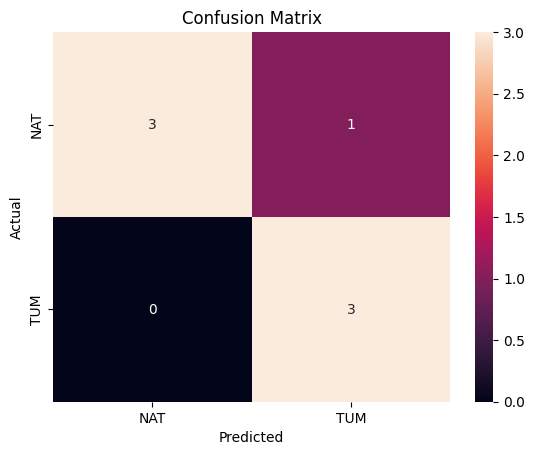

AUC score with top 25 features: 1.0


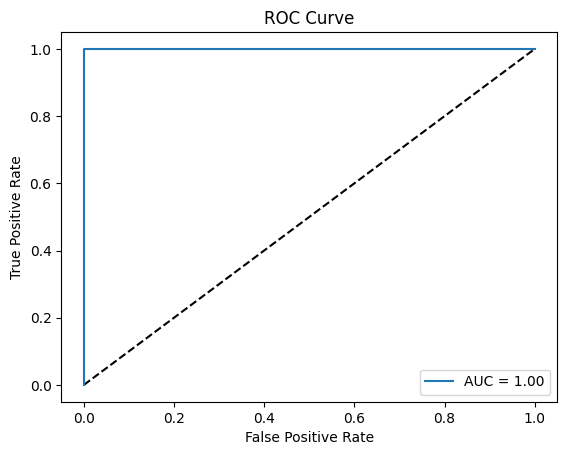

In [11]:
# Logistic regression model with Elastic Net regularization
log_reg = LogisticRegressionCV(
    Cs=10,                    # Number of different regularization strengths to try
    penalty='elasticnet',    # Elastic Net penalty
    solver='saga',           # SAGA solver supports Elastic Net
    l1_ratios=[0.1, 0.5, 0.9],    # Mix of L1 and L2 regularization
    cv=5,                    # 3-fold cross-validation
    max_iter=5000           # Increase max iterations
)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Use SelectFromModel to select the top 25 features
select_model = SelectFromModel(estimator=log_reg, max_features=25)
select_model.fit(X_train, y_train)

# Get the indices of the selected features
selected_features_logreg = X_train.columns[select_model.get_support()]

# Display the top 25 features
print("Selected top 25 features using SelectFromModel:")
print(selected_features_logreg)

# Transform the dataset to only include selected features
X_train_selected = select_model.transform(X_train)
X_test_selected = select_model.transform(X_test)
print(X_train_selected.shape, X_test_selected.shape)

# Retrain the model on the reduced feature set
log_reg.fit(X_train_selected, y_train)

# Print cross-validation accuracy scores
print("Mean cross-validation accuracy (train set):",
      np.mean(log_reg.scores_[1]))

# Make predictions on the test set using the reduced feature set
y_pred = log_reg.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with top 25 features:", accuracy)

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['NAT', 'TUM'], yticklabels=['NAT', 'TUM'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate ROC curve
y_pred_prob = log_reg.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC score with top 25 features:", auc)
# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### `Random Forest Model`

Best parameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Top 25 features by importance: ['MB_1180' 'MB_1581' 'MB_1248' 'MB_369' 'MB_2053' 'MB_2128' 'MB_1228'
 'MB_1981' 'MB_3118' 'MB_54' 'MB_1722' 'MB_1773' 'MB_1727' 'MB_1724'
 'MB_3668' 'MB_437' 'MB_1963' 'MB_359' 'MB_981' 'MB_1616' 'MB_3178'
 'MB_3042' 'MB_248' 'MB_2878' 'MB_3011']
Mean cross-validation accuracy (Train set): 0.8699999999999999
Accuracy with top 25 features (Test set): 1.0
Confusion Matrix:


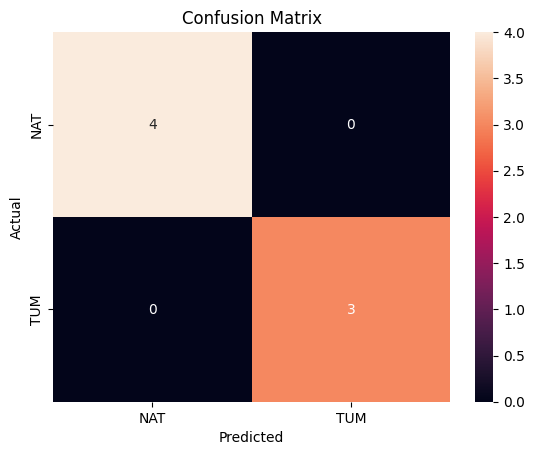

AUC: 1.0


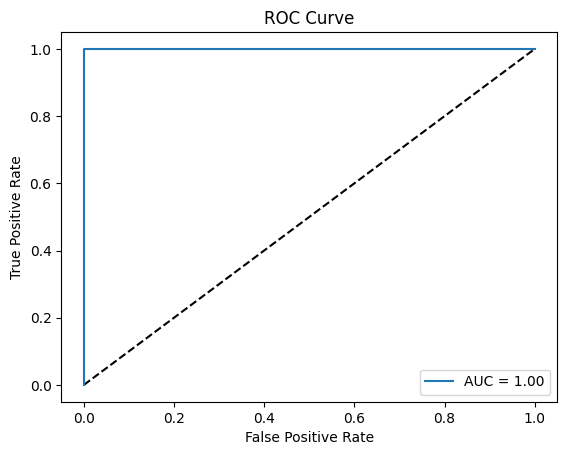

In [12]:
# The Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],   # Different numbers of trees
    'max_depth': [10, 20, None],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]    # Minimum samples required to split an internal node
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters from the grid search
print("Best parameters found:", grid_search.best_params_)

# Train Random Forest with the best parameters on the full training dataset
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Get feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X is a DataFrame
    'Importance': importances
})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 25 features
selected_features_rf_op = feature_importance_df.head(25)['Feature'].values

# Print the top 25 features
print(f"Top 25 features by importance: {selected_features_rf_op}")


# Retrain the model with the modified dataset with only the top 25 features
X_train_selected = X_train[selected_features_rf_op]
X_test_selected = X_test[selected_features_rf_op]
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train_selected, y_train)

# Cross-validation accuracy on the training set
cv_scores = cross_val_score(best_rf_model, X_train_selected, y_train, cv=5)
print("Mean cross-validation accuracy (Train set):", np.mean(cv_scores))

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with top 25 features (Test set):", accuracy)

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['NAT', 'TUM'], yticklabels=['NAT', 'TUM'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get the predicted probabilities
y_pred_prob = best_rf_model.predict_proba(X_test_selected)[:,1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)
# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### ```SVM model with L1 regularization```<br>
##### We will find the top features as per L1 regularization.

Selected features by L1 regularization:
Index(['MB_22', 'MB_63', 'MB_169', 'MB_358', 'MB_369', 'MB_375', 'MB_1015',
       'MB_1248', 'MB_1336', 'MB_1581', 'MB_1727', 'MB_1875', 'MB_1900',
       'MB_1954', 'MB_1963', 'MB_1981', 'MB_2098', 'MB_2623', 'MB_3043',
       'MB_3155', 'MB_3572'],
      dtype='object', name=0)
Mean cross-validation accuracy (Train set): 1.0
Accuracy with selected features by L1 (Test set): 0.8571428571428571
Confusion Matrix:


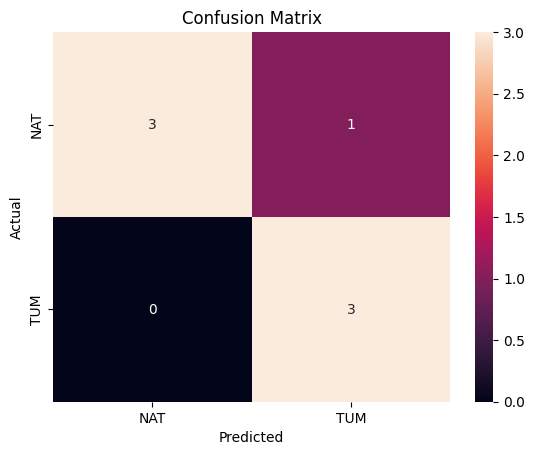

AUC: 0.9166666666666666


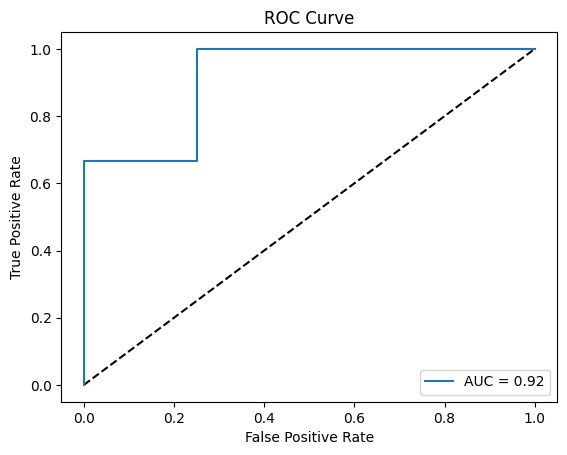

In [13]:
# The SVM model with L1 regularization and dual=False for small datasets
svm_l1_model = LinearSVC(penalty='l1', dual=False, random_state=42, max_iter=10000)

# Fit the model on the training data
svm_l1_model.fit(X_train, y_train)

# Select features with non-zero coefficients (L1 regularization performs feature selection)
selector = SelectFromModel(svm_l1_model, max_features=25, prefit=True)
X_train_selected = selector.transform(X_train.values)
X_test_selected = selector.transform(X_test.values)

# Display the selected features
selected_features_svm_l1 = X_train.columns[selector.get_support()]
print("Selected features by L1 regularization:")
print(selected_features_svm_l1)

# Cross-validation accuracy on the training set
cv_scores = cross_val_score(svm_l1_model, X_train_selected, y_train, cv=5)
print("Mean cross-validation accuracy (Train set):", np.mean(cv_scores))

svm_l1_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_l1_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features by L1 (Test set):", accuracy)

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['NAT', 'TUM'], yticklabels=['NAT', 'TUM'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get the predicted probabilities
y_pred_prob = svm_l1_model.decision_function(X_test_selected)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)
# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### ```SVM model with Recursive Feature Elimination``` <br>
##### Using this we will find the top 25 features.

Selected top 25 features by RFE:
Index(['MB_22', 'MB_111', 'MB_169', 'MB_375', 'MB_590', 'MB_712', 'MB_1015',
       'MB_1175', 'MB_1180', 'MB_1207', 'MB_1248', 'MB_1336', 'MB_1340',
       'MB_1370', 'MB_1581', 'MB_1789', 'MB_1900', 'MB_1917', 'MB_1963',
       'MB_2098', 'MB_2375', 'MB_2823', 'MB_2908', 'MB_3058', 'MB_3572'],
      dtype='object', name=0)
(24, 25) (7, 25)
Mean cross-validation accuracy (Train set): 1.0
Accuracy with top 25 features: (Test set) 0.5714285714285714
Confusion Matrix:


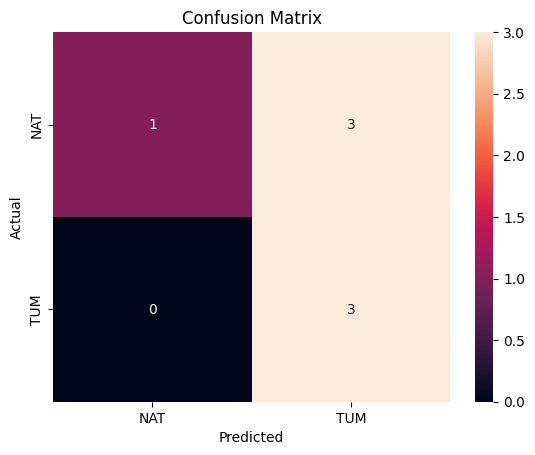

AUC: 1.0


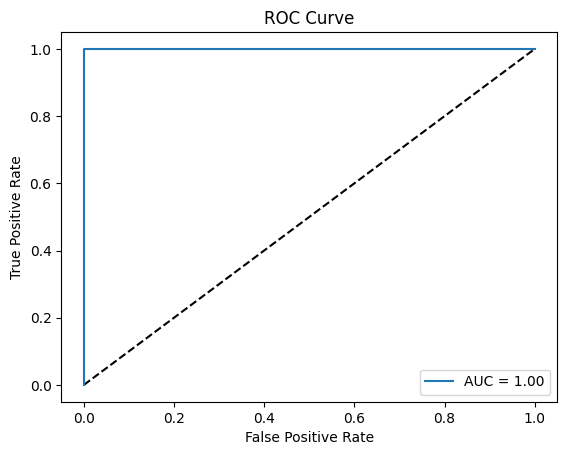

In [14]:
# The SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Apply Recursive Feature Elimination (RFE) to select top 25 features
rfe = RFE(estimator=svm_model, n_features_to_select=25, step=1)
rfe.fit(X_train, y_train)

# Get the ranking of the features and the selected features
selected_features_svm_rfe = X_train.columns[rfe.support_]
ranking = rfe.ranking_

# Display the top 25 features selected by RFE
print("Selected top 25 features by RFE:")
print(selected_features_svm_rfe)

# Make predictions using the model on the test set with the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

print(X_train_selected.shape, X_test_selected.shape)
# Fit the SVM model with the selected features
svm_model.fit(X_train_selected, y_train)

# Cross-validation accuracy on the training set
cv_scores = cross_val_score(svm_model, X_train_selected, y_train, cv=5)
print("Mean cross-validation accuracy (Train set):", np.mean(cv_scores))

# Make predictions on the test set
y_pred = svm_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with top 25 features: (Test set)", accuracy)

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['NAT', 'TUM'], yticklabels=['NAT', 'TUM'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get the predicted probabilities
y_pred_prob = svm_model.decision_function(X_test_selected)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)
# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#### `Results`

In [15]:
# Convert Series to lists
selected_features_logreg = selected_features_logreg.tolist()
selected_features_rf_op = selected_features_rf_op.tolist()
selected_features_svm_l1 = selected_features_svm_l1.tolist()
selected_features_svm_rfe = selected_features_svm_rfe.tolist()

# Find the maximum length of the arrays
max_length = max(len(selected_features_logreg), len(selected_features_rf_op), len(selected_features_svm_l1), len(selected_features_svm_rfe))

# Pad the arrays with None to make them the same length
selected_features_logreg += [None] * (max_length - len(selected_features_logreg))
selected_features_rf_op += [None] * (max_length - len(selected_features_rf_op))
selected_features_svm_l1 += [None] * (max_length - len(selected_features_svm_l1))
selected_features_svm_rfe += [None] * (max_length - len(selected_features_svm_rfe))

# Create the DataFrame
selected_features = pd.DataFrame({
    'Logistic Regression': selected_features_logreg,
    'Random Forest': selected_features_rf_op,
    'SVM L1': selected_features_svm_l1,
    'SVM RFE': selected_features_svm_rfe
})

# Save to Excel
selected_features.to_excel('../results/selected_features_tumVsnat_positive.xlsx', index=False)